## Declaração de bibliotecas e demais configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções relacionadas ao método ou auxiliares

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x


#Função de predição---------------------------------------------------------
def class_predictor(x,w):
    if (w.dot( np.hstack((1,x)) ) >= 0): return 1
    else: return -1

#Função discriminante-------------------------------------------------------
def disc_function_value(x,w):
    return w.dot( np.hstack((1,x)) )


#Algoritmo "Soma dos Erros Quadráticos-------------------------------------
def SSE(x,y):
    w = np.zeros( x.shape[1] + 1 ) #espaço extendido...
    A = np.zeros( (x.shape[1] + 1 , x.shape[1] + 1) ) #definidno uma matriz (n+1)x(n+1)
    B = np.zeros( x.shape[1] + 1 ) #definidno uma matriz/vetor 1x(n+1)
    
    for xi, yi in zip(x,y):
        A += (np.asmatrix( np.hstack( (1,xi) )  ).T).dot(np.asmatrix( np.hstack( (1,xi) ) ))
        B += yi * np.hstack( (1,xi) )
        
    w = B.dot(np.linalg.inv(A))
    return w

## Implementação da estratégia OVR adaptada ao SSE

In [3]:
def multiclass_ovr_dataset_sse(trainX, trainY, dataset):
    
    N = dataset.shape[0]
    claIndex = np.unique(trainY)
    discFun = np.ndarray( (claIndex.size , N) )
    for k in range(0,claIndex.size):

        labelPos = np.where(trainY == claIndex[k])
        labelNeg = np.where(trainY != claIndex[k])

        binY = np.copy(trainY)
        binY[labelPos] = +1
        binY[labelNeg] = -1

        w =  SSE(trainX,binY)

        for i in range(0,N):
            padrao = dataset[i,:]
            discFun[k,i] = disc_function_value(padrao,w)

    yEst = np.zeros(N)
    for i in range(0,N):
        maxInd = np.where( discFun[:,i] == np.max(discFun[:,i]) )
        yEst[i] = claIndex[maxInd]

    return yEst

## Leitura dos dados
* Fazemos aqui a leitura dos dados simulados no 'juputer-notebook':"Pratica-SepLin-SimulacaoDados"
* $\texttt{path_D}$ corresponde aos dados de treinamento
* $\texttt{path_I}$ corresponde aos dados usados para avaliação do método

In [4]:
#Dados de treinamento
path_D = 'saidaSim_D_SepLin.txt'

#Dados de avaliação
path_I = 'saidaSim_I_SepLin.txt'

#Leitura dos dados
yD,xD = read_class_data(path_D)
yI,xI = read_class_data(path_I)

In [5]:
xI.shape[0]

2000

## Classificação dos dados
* A função $\texttt{multiclass_ovr_dataset_sse}$ é usada na classificação multiclasse;
* A estratégia OVR é usada (observar o código para entender como a estratégia atua);
* Os dois primeiros argumentos correspondem às informações de treinamento, já o terceiro argumento compreende o conjunto de dados a ser classificado;
* Em especial, os dados a serem classificados estão organizados em uma matriz $N \times n$, sendo $N$ o número de exemplos a ser classificado e $n$ é a dimensão dos padrões (neste caso $n=2$)

In [6]:
yEst = multiclass_ovr_dataset_sse(xD, yD, xI)

## Avaliação da acurácia
* O processo de avaliação é bem simples
* É apenas feita uma contagem do número de concordâncias entre $\texttt{yI}$ e $\texttt{yEst}$
* O valor obtido é dividido por $N$, a fim de expressar a precisão em termos de porcentagem

In [7]:
acerto = np.count_nonzero( yI == yEst ) / yI.size
print("Acerto: %f "%(acerto))

Acerto: 0.886000 


## Visualização dos resultados
* Diferente da aula anterior, vamos fazer uma visualização diferente dos resultados
* Acertos de classificação serão denotados em azul
* Erros de classificação serão denotados em vermelho

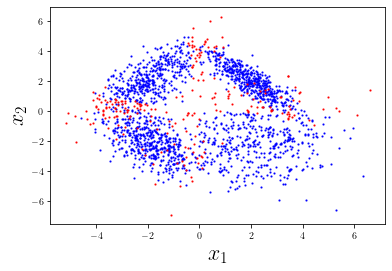

In [8]:
posAcerto = np.where( (yI-yEst) == 0)
posErro   = np.where( (yI-yEst) != 0)

plt.plot(xI[posAcerto,0],xI[posAcerto,1],'s',color='blue', markersize=1)
plt.plot(xI[posErro,0],xI[posErro,1],'s',color='red', markersize=1)

plt.xlabel('$x_1$', fontsize=22)
plt.ylabel('$x_2$', fontsize=22)

plt.show()